  ##  Importing Libraries    

In [1]:
install.packages("tidyverse") 
install.packages("lubridate")
install.packages("tree")
install.packages("Matching")
install.packages("boot")
install.packages("randomForest")
install.packages("arm")
install.packages("ggplot2")
install.packages("cobalt")
library(sm)
library(tidyverse) # for data manipulation and visualization
library(lubridate)
library(tree)
library(Matching)
library(boot)
library(randomForest)
library(arm)
library(ggplot2)
library(cobalt)

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages
package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages
package 'Matching' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages
package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages
package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacob\AppData\Local\Temp\Rtmpe8jk3N\downloaded_packages


Warning message:
"package 'sm' was built under R version 3.6.3"Package 'sm', version 2.2-5.6: type help(sm) for summary information
Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts -------------------------

ERROR: Error: package or namespace load failed for 'arm' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'


  ##  Data Creation (Number 1) 

In [62]:
## Given Code
n = 1000
## Generating a random data set here
#Syntax for the normal distribution here is rnorm(sample size, mean, SD)
V1 = rnorm(n, 45, 10)
#getting a binary variable
V2 = sample(c(1,0), 
             replace = TRUE, 
             size = n,
             prob = c(.4,.6))
V3 = rnorm(n, V1/10, 1)
V4 = rnorm(n, 0, 1)
D  = as.numeric(pnorm(rnorm(n, .01*V1 + .8*V2 + 0.3*V3 + V4, 1), .45 + .32 + .3*4.5, 1) > .5)
Y  = rnorm(n, .8*D - 0.45*V2 - .4*V3 + 2, .2)
# combining everything in a data frame
df = data.frame(V1, V2, V3, V4, D, Y)



## Plotting the outcome variable against the treatment variable. 

`geom_smooth()` using formula 'y ~ x'


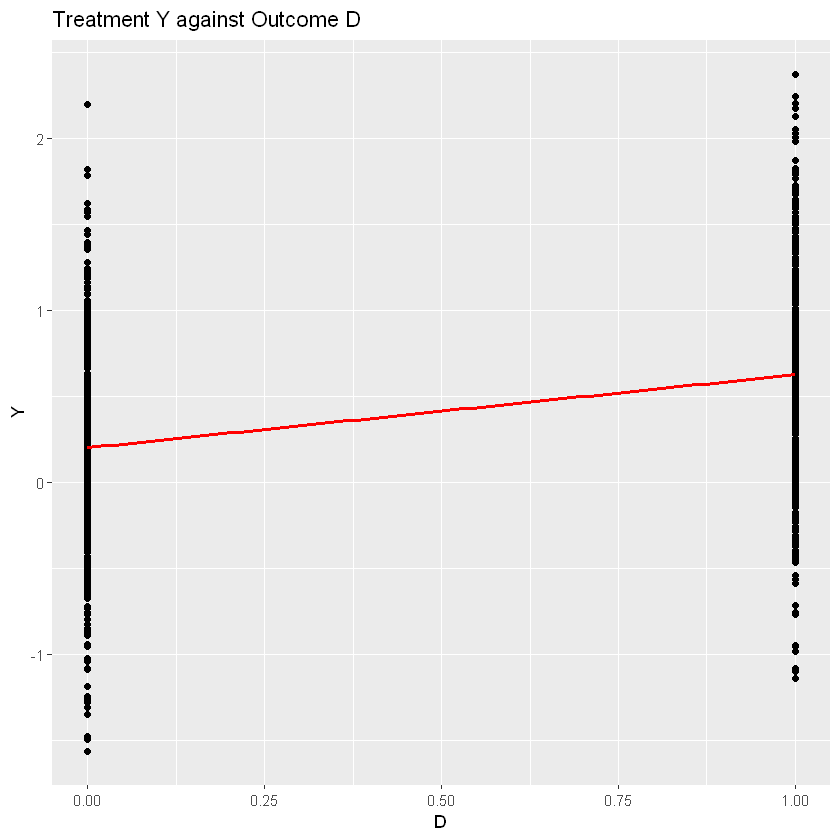

In [4]:
plot =ggplot(df, aes(x=D, y=Y))+geom_point()+ geom_smooth(method="glm", col="red", se = FALSE)+ggtitle("Treatment Y against Outcome D" )
plot



In [63]:
#How is the Data Correlated?
glm1 <- glm(Y~V1)
glm2 <- glm(Y~V2)
glm3 <- glm(Y~V3)
glm4 <- glm(Y~V4)
glm5 <- glm(Y~D)
cor(Y,V1) 
cor(Y,V2)
cor(Y,V3)
cor(Y,V4)
cor(Y,D)

[1] -0.5310074

[1] -0.2646606

[1] -0.7294655

[1] 0.3281427

[1] 0.2904669

## Balance

Warning message:
"package 'gridExtra' is in use and will not be installed"

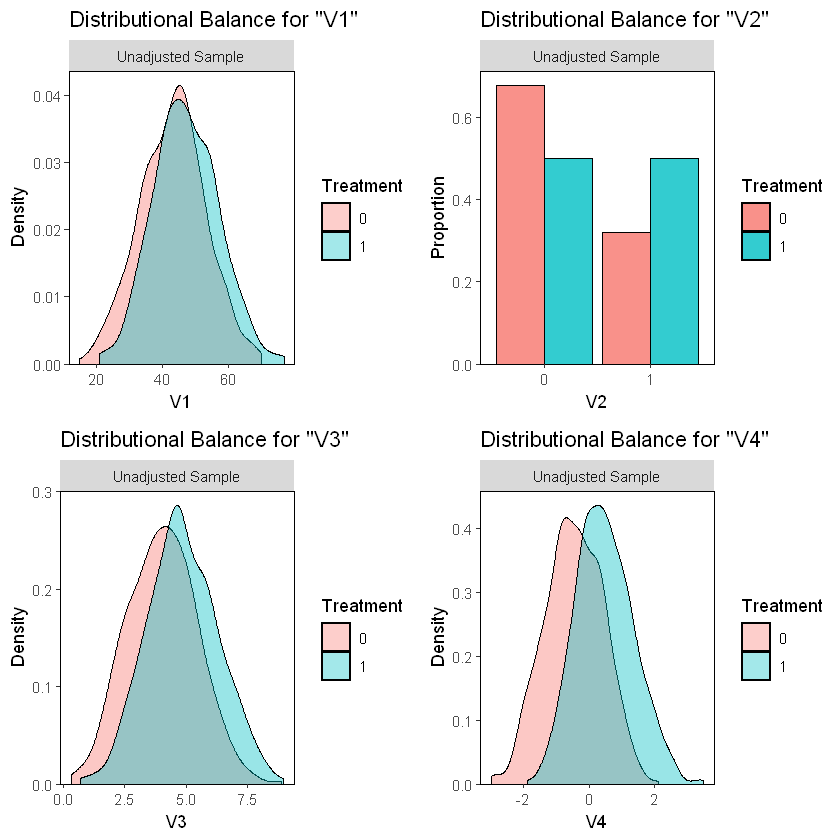

In [64]:
library(sm)
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

dens_plot1 <- bal.plot(x = df, var.name="V1", type = "density", which = "adjusted", mirror = FALSE, treat = df$D)
dens_plot2 <- bal.plot(x = df, var.name="V2", type = "density", which = "adjusted", mirror = FALSE, treat = df$D)
dens_plot3 <- bal.plot(x = df, var.name="V3", type = "density", which = "adjusted", mirror = FALSE, treat = df$D)
dens_plot4 <- bal.plot(x = df, var.name="V4", type = "density", which = "adjusted", mirror = FALSE, treat = df$D)

#I understand that histogram is more appropriate in this case, but I find the density graphs more intuitive examine balance, so I added them as well
grid.arrange(dens_plot1, dens_plot2, dens_plot3, dens_plot4, nrow = 2)

## Balance of Means

Warning message:
"Deprecated"Note: 's.d.denom' not specified; assuming pooled.
Warning message:
"Standardized mean differences and raw mean differences are present in the same plot. 
Use the 'stars' argument to distinguish between them and appropriately label the x-axis."

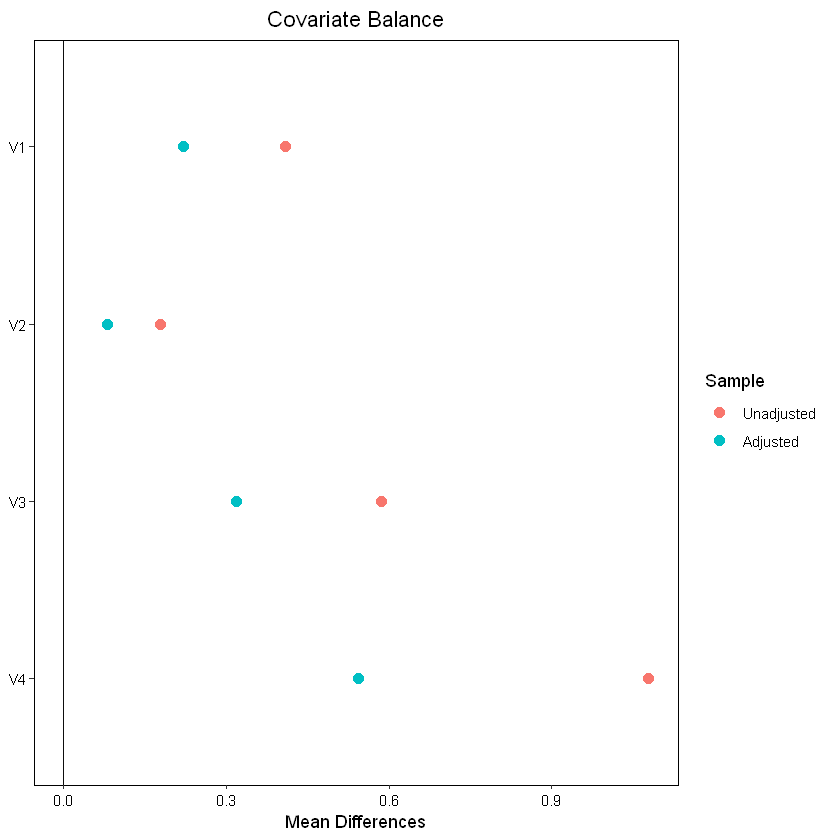

In [65]:
library(WeightIt)
library(cobalt)
 
prop1 <- glm(D ~V1+V2+V3+V4 , family = "binomial",data=df)
love.plot(prop1)


## Prima Facie treatment effect 

In [66]:
mean(df$Y[D == 1]) - mean(df$Y[D == 0]) #Difference btw expected outcome and outcome observed?
#D is the treatment variable. We subtract average of datasets with 1 in treatment and 0 for Control.


[1] 0.388749

## Balance of Covariates

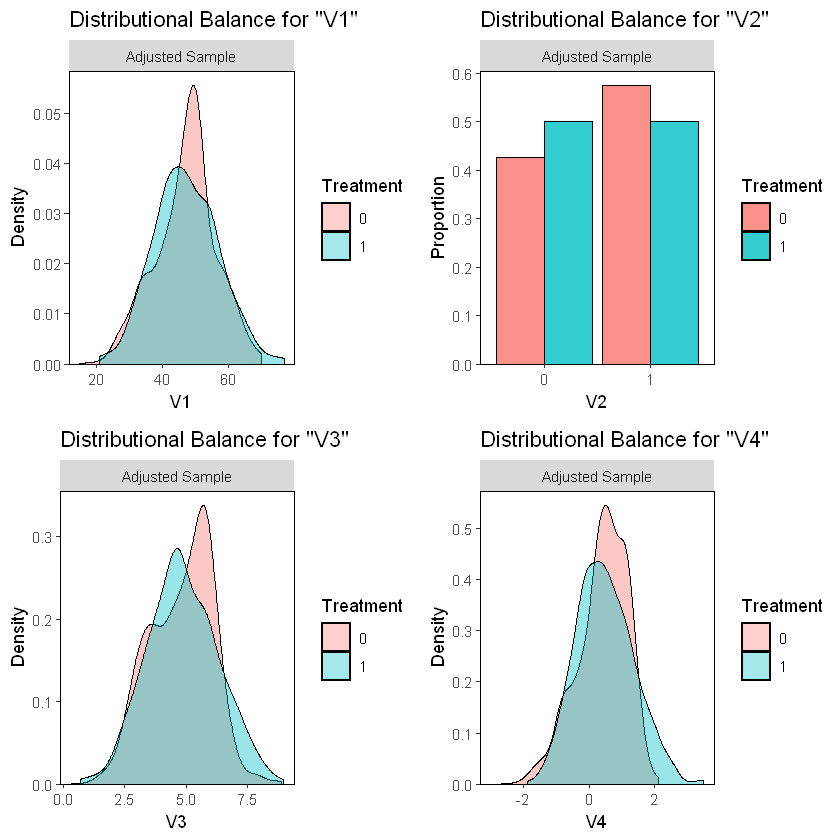

In [68]:
#Reviewed ny Answer with Daniel Kalu
library(sm)
library(ggplot2)
#install.packages("gridExtra")
library(gridExtra)
 
dens_plot1 <- bal.plot(matchout.prop, var.name="V1", type = "density", which = "adjusted", covs = cbind(V1, V2, V3, V4),mirror = FALSE, treat = df$D)
dens_plot2 <- bal.plot(matchout.prop, var.name="V2", type = "density", which = "adjusted", covs = cbind(V1, V2, V3, V4), mirror = FALSE, treat = df$D)
dens_plot3 <- bal.plot(matchout.prop, var.name="V3", type = "density", which = "adjusted", covs = cbind(V1, V2, V3, V4),mirror = FALSE, treat = df$D)
dens_plot4 <- bal.plot(matchout.prop, var.name="V4", type = "density", which = "adjusted",covs = cbind(V1, V2, V3, V4), mirror = FALSE, treat = df$D)
 
 
grid.arrange(dens_plot1, dens_plot2, dens_plot3, dens_plot4, nrow = 2)
 


## Question 2


In [72]:
daughters = read.csv(url("http://bit.ly/daughters_data")) %>% 
 # clean_names()
daughters = read.csv(url("http://bit.ly/daughters_data"))
#(which(is.na(daughters)))
daughter <- (na.omit(daughters)) #Omit Null Values
summary(daughters) #Summarize Data
head(daughters)
#clean_names()
colnames(daughters, do.NULL = TRUE, prefix = "col") #Check ColumnS 
glm1 <- glm( nowtot ~Dems + Repubs+ Christian + age+ srvlng + demvote, data=daughters) #Regress the model using hasgirls as
#treated variables
glm1 <- glm( hasgirls ~Dems + Repubs+ Christian + age+ srvlng + demvote, data=daughters) #Regress the model using hasgirls as
#treated variable
glm1
summary(glm1)
coef(summary(glm1))["hasgirls","Estimate"]
confint(glm1, "hasgirls")
 
data2 <- subset(daughter, select = c(Dems, Repubs, Christian, age, srvlng, demvote))
 
bal <- bal.plot(daughter$hasgirls ~ daughter$age,  type = "density", treat = daughter$hasgirls)
bal2 <- bal.plot(daughter$hasgirls ~ daughter$srvlng,  type = "density", treat = daughter$hasgirls)
bal3 <- bal.plot(daughter$hasgirls ~ daughter$demvote,  type = "density", treat = daughter$hasgirls)
 
grid.arrange(bal, bal2 , bal3,  nrow = 2)


ERROR: Error in read.csv(url("http://bit.ly/daughters_data")) %>% daughters = read.csv(url("http://bit.ly/daughters_data")): target of assignment expands to non-language object


## Genetic Matching

In [73]:
#Got some small Help From Naol Sileshi
# attach dataset
attach(daughters)
 
# bind multivariate
X <- cbind(Dems,Repubs,Christian,age,srvlng,demvote)
 
# set treatment variable
Tr <- hasgirls
 
# run genetic matching
gen1.out <- GenMatch(Tr = Tr,
                   X = X,
                   estimand = "ATT",
                   M = 1,
                   pop.size = 16,
                   max.generations = 10,
                   wait.generations = 5,
                   unif.seed = 123, 
                   int.seed = 92485,
                   print.level = 0)
 
# match to get treatment effect
m3.out <- Match(Tr = Tr,
                X = X,
                Y = nowtot,
                M = 1,
                estimand = "ATT",
                Weight.matrix = gen1.out
          )
 
# detach dataset
detach(daughters)
 
# present treatment effect
cat("Treatment Effect Post Genetic Matching:", m3.out$est)


The following object is masked _by_ .GlobalEnv:

    X

The following objects are masked from daughter (pos = 3):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, hasgirls, haskids, medinc, morecrimesp, moredef,
    moreserv, name, nboys, ngirls, none, now1, now10, now11, now12,
    now13, now14, now15, now16, now17, now18, now19, now2, now20, now3,
    now4, now5, now6, now7, now8, now9, nowtot, OtherC, OtherR,
    OthParty, party, percol, perf, perhs, perur, perw, propgirls,
    Protestant, protgay, reg1, reg2, reg3, reg4, reg5, reg6, reg7,
    reg8, reg9, region, repub, Repubs, rgroup, rtl, srvlng, statabb,
    statalph, statenam, totchi, white, X, year

The following objects are masked from daughter (pos = 4):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, h

Treatment Effect Post Genetic Matching: 0.8653846

## Improvements to Genetic Matches

In [74]:
# attach dataset
attach(daughters)
 
# bind multivariate
X <- cbind(Dems,Repubs,Christian,age,srvlng,demvote)
 
# set treatment variable
Tr <- hasgirls
 
# run genetic matching
gen1.out <- GenMatch(Tr = Tr,
                   X = X,
                   estimand = "ATT",
                   M = 4,
                   pop.size = 14,
                   max.generations = 10,
                   wait.generations = 2,
                   unif.seed = 123, 
                   int.seed = 92485,
                     caliper=0.1,
                   print.level = 0)
 
# match to get treatment effect
m3.out <- Match(Tr = Tr,
                X = X,
                Y = nowtot,
                M = 1,
                estimand = "ATT",
                Weight.matrix = gen1.out
          )
 
# detach dataset
detach(daughters)
 
# present treatment effect
cat("Treatment Effect Post Genetic Matching:", m3.out$est)
summary(m3.out)
summary(gen1.out)


The following object is masked _by_ .GlobalEnv:

    X

The following objects are masked from daughter (pos = 3):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, hasgirls, haskids, medinc, morecrimesp, moredef,
    moreserv, name, nboys, ngirls, none, now1, now10, now11, now12,
    now13, now14, now15, now16, now17, now18, now19, now2, now20, now3,
    now4, now5, now6, now7, now8, now9, nowtot, OtherC, OtherR,
    OthParty, party, percol, perf, perhs, perur, perw, propgirls,
    Protestant, protgay, reg1, reg2, reg3, reg4, reg5, reg6, reg7,
    reg8, reg9, region, repub, Repubs, rgroup, rtl, srvlng, statabb,
    statalph, statenam, totchi, white, X, year

The following objects are masked from daughter (pos = 4):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, h

Treatment Effect Post Genetic Matching: 0.9695513
Estimate...  0.96955 
AI SE......  2.1335 
T-stat.....  0.45444 
p.val......  0.64951 

Original number of observations..............  430 
Original number of treated obs...............  312 
Matched number of observations...............  312 
Matched number of observations  (unweighted).  313 



              Length Class  Mode   
value         12     -none- numeric
par            6     -none- numeric
Weight.matrix 36     -none- numeric
matches        6     -none- numeric
ecaliper       6     -none- numeric

## Improvement 2

In [75]:
attach(daughters)
 
# bind multivariate
X <- cbind(Dems,Repubs,Christian,age,srvlng,demvote)
 
# set treatment variable
Tr <- hasgirls
 
# run genetic matching
gen1.out <- GenMatch(Tr = Tr,
                   X = X,
                   estimand = "ATT",
                   M = 4,
                   pop.size = 10,
                   max.generations = 9,
                   wait.generations = 2,
                   unif.seed = 123, 
                   int.seed = 92485,
                     caliper=0.01,
                   print.level = 0)
 
# match to get treatment effect
m3.out <- Match(Tr = Tr,
                X = X,
                Y = nowtot,
                M = 4,
                estimand = "ATT",
                Weight.matrix = gen1.out
          )
 
# detach dataset
detach(daughters)
 
# present treatment effect
cat("Treatment Effect Post Genetic Matching:", m3.out$est)
summary(m3.out)
summary(gen1.out)
 


The following object is masked _by_ .GlobalEnv:

    X

The following objects are masked from daughter (pos = 3):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, hasgirls, haskids, medinc, morecrimesp, moredef,
    moreserv, name, nboys, ngirls, none, now1, now10, now11, now12,
    now13, now14, now15, now16, now17, now18, now19, now2, now20, now3,
    now4, now5, now6, now7, now8, now9, nowtot, OtherC, OtherR,
    OthParty, party, percol, perf, perhs, perur, perw, propgirls,
    Protestant, protgay, reg1, reg2, reg3, reg4, reg5, reg6, reg7,
    reg8, reg9, region, repub, Repubs, rgroup, rtl, srvlng, statabb,
    statalph, statenam, totchi, white, X, year

The following objects are masked from daughter (pos = 4):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, h

Treatment Effect Post Genetic Matching: 0.2019231
Estimate...  0.20192 
AI SE......  1.967 
T-stat.....  0.10265 
p.val......  0.91824 

Original number of observations..............  430 
Original number of treated obs...............  312 
Matched number of observations...............  312 
Matched number of observations  (unweighted).  1249 



              Length Class  Mode   
value         12     -none- numeric
par            6     -none- numeric
Weight.matrix 36     -none- numeric
matches        6     -none- numeric
ecaliper       6     -none- numeric

## Improvement 3

In [76]:
# attach dataset
attach(daughters)
 
# bind multivariate
X <- cbind(Dems,Repubs,Christian,age,srvlng,demvote)
 
# set treatment variable
Tr <- hasgirls
 
# run genetic matching
gen1.out <- GenMatch(Tr = Tr,
                   X = X,
                   estimand = "ATT",
                   M = 6,
                   pop.size = 18,
                   max.generations = 12,
                   wait.generations = 4,
                   unif.seed = 123, 
                   int.seed = 92485,
                     caliper=0.003,
                   print.level = 0)
 
# match to get treatment effect
m3.out <- Match(Tr = Tr,
                X = X,
                Y = nowtot,
                M = 6,
                estimand = "ATT",
                Weight.matrix = gen1.out
          )
 
# detach dataset
detach(daughters)
 
# present treatment effect
cat("Treatment Effect Post Genetic Matching:", m3.out$est)
summary(m3.out)
summary(gen1.out)
 


The following object is masked _by_ .GlobalEnv:

    X

The following objects are masked from daughter (pos = 3):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, hasgirls, haskids, medinc, morecrimesp, moredef,
    moreserv, name, nboys, ngirls, none, now1, now10, now11, now12,
    now13, now14, now15, now16, now17, now18, now19, now2, now20, now3,
    now4, now5, now6, now7, now8, now9, nowtot, OtherC, OtherR,
    OthParty, party, percol, perf, perhs, perur, perw, propgirls,
    Protestant, protgay, reg1, reg2, reg3, reg4, reg5, reg6, reg7,
    reg8, reg9, region, repub, Repubs, rgroup, rtl, srvlng, statabb,
    statalph, statenam, totchi, white, X, year

The following objects are masked from daughter (pos = 4):

    aauw, age, alabort, anygirls, bday, Catholic, Christian, congress,
    Dems, demvote, district, dr1per, dr2per, dr3per, dr4per, dr5per,
    female, hasboys, h

Treatment Effect Post Genetic Matching: 0.8585165
Estimate...  0.85852 
AI SE......  2.0355 
T-stat.....  0.42178 
p.val......  0.67319 

Original number of observations..............  430 
Original number of treated obs...............  312 
Matched number of observations...............  312 
Matched number of observations  (unweighted).  1877 



              Length Class  Mode   
value         12     -none- numeric
par            6     -none- numeric
Weight.matrix 36     -none- numeric
matches        6     -none- numeric
ecaliper       6     -none- numeric

## Some Changes

In [77]:
#I had to ask Daniel for some Help
step6_RepeatDf <- daughters
step6_RepeatDf$newtreat <- NA
 
# we apply the conditions for control and treatment
step6_RepeatDf$newtreat[step6_RepeatDf$ngirls >= 2 & step6_RepeatDf$nboys == 0] <- 1
step6_RepeatDf$newtreat[step6_RepeatDf$nboys >= 2 & step6_RepeatDff$ngirls == 0] <- 0
 
# we the keep in the data only the ones that apply to the condition
step6_RepeatDf<- step6_RepeatDf[ which(step6_RepeatDf$newtreat==0 | step6_RepeatDf$newtreat == 1), ]
 
 
######step 1 again:
Q2lm6 <- lm(nowtot ~ newtreat + dems + repubs+ christian + age + srvlng + demvote , data = step6_RepeatDf)
 
coef(summary(Q2lm6))["newtreat","Estimate"]
Q2mout6 <- MatchBalance(newtreat ~ dems + repubs+ christian + age + srvlng + demvote, data = step6_RepeatDf, nboots = 500)
 
repeat_Balance1 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$dems,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
repeat_Balance2 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$repubs,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
repeat_Balance3 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$christian,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
repeat_Balance4 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$age,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
repeat_Balance5 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$srvlng,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
repeat_Balance6 <- bal.plot(step6_RepeatDf$newtreat ~ step6_RepeatDf$demvote,  type = "histogram", treat = step6_RepeatDf$newtreat, mirror = TRUE)
 
grid.arrange(repeat_Balance1, repeat_Balance2,repeat_Balance3, repeat_Balance4, repeat_Balance5, repeat_Balance6,  nrow = 2)
 
###Step 2 revised:
 
daughter_Y6= step6_RepeatDf$nowtot
 
Q2Tr6 = step6_RepeatDf$newtreat
 
Q2_2_X6 <- cbind(step6_RepeatDf$dems, step6_RepeatDf$repubs, step6_RepeatDf$christian, step6_RepeatDf$age , step6_RepeatDf$srvlng , step6_RepeatDf$demvote)
 
 
###
invisible(capture.output(Q2genout6 <- GenMatch(Tr = Q2Tr6, X = Q2_2_X6, estimand ='ATT', pop.size = 10 , BalanceMatrix = Q2_2_X6 , max.generations = 15 , unif.seed = 123, int.seed = 92485)))
 
 
matchout.gen6 <- Match(Tr = Q2Tr6, X= Q2_2_X6, estimand ='ATT', Weight.matrix = Q2genout6, M=1)
 
mbout_Q2_26 <- MatchBalance(newtreat ~ dems + repubs+ christian + age + srvlng + demvote, data = step6_RepeatDf, match.out = matchout.gen6, nboots=1000)
mout_Q2_2_TE6 <- Match( Weight.matrix = Q2genout6, Y= daughter_Y6, Tr = Q2Tr6, X= Q2_2_X6, estimand ='ATT', M=1)
 
mbout_Q2_2_TE <- MatchBalance(newtreat ~ dems + repubs+ christian + age + srvlng + demvote, data = step6_RepeatDf, match.out = mout_Q2_2_TE6, nboots=1000)
summary(mout_Q2_2_TE6)
mout_Q2_2_TE6$est
 


ERROR: Error in step6_RepeatDf$newtreat[step6_RepeatDf$nboys >= 2 & step6_RepeatDff$ngirls == : object 'step6_RepeatDff' not found


## Matching with #totchi

In [78]:
# Your code here
mean(daughters$totchi)
mean(daughters$nboys)
mean(daughters$ngirls)


[1] 2.497674

[1] 1.223256

[1] 1.274419

## Question 3


In [79]:
brfss = read.csv("http://bit.ly/BRFSS_data") %>% 
  #clean_names()
head(brfss)

ERROR: Error in clean_names(.): could not find function "clean_names"


## Checking Balance of Bfrss

Assuming 'Yes' is the treated level. If not, supply an argument to 'focal'.
Warning message:
"Standardized mean differences and raw mean differences are present in the same plot. 
Use the 'stars' argument to distinguish between them and appropriately label the x-axis."

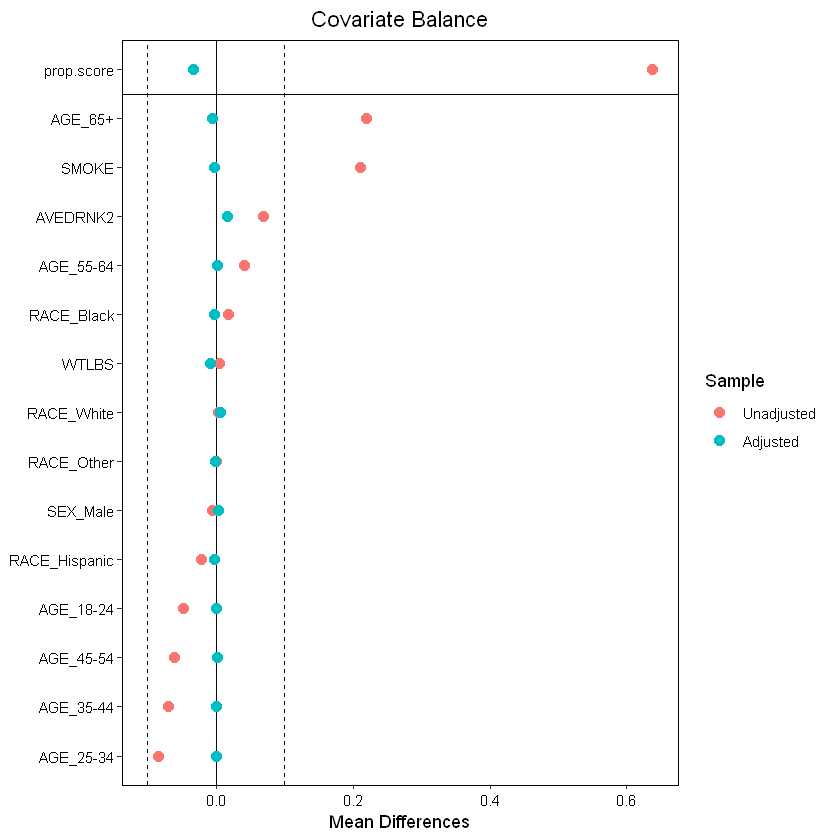

In [80]:
#(From Cobalt Documentation)
library(WeightIt)
library(cobalt)
 
mb1 <- weightit(COPD ~ SMOKE+RACE+AGE+SEX+WTLBS+AVEDRNK2,
                   data = brfss, estimand = "ATT", method = "ps")
love.plot(mb1,thresholds = c(m = .1), var.order = "unadjusted")


## Mahalanobis Matching


In [83]:

library(MatchIt)
brfss[sapply(brfss, is.character)] <- lapply(brfss[sapply(brfss, is.character)], as.factor)
m.out2=matchit(COPD ~ SMOKE+RACE+SEX+WTLBS,data=brfss, mahvars=c("SMOKE","RACE","SEX","WTLBS"),caliper=.25, replace=FALSE,estimand = "ATT")
summary(m.out2)


Warning message:
"package 'MatchIt' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'MatchIt' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'Rcpp' 1.0.1 is already loaded, but >= 1.0.5 is required


## Mahalanobis Matching 2

In [84]:
## Got some help from Daniel Kalu
 
X1 <- cbind( brfss$race, brfss$age, brfss$sex, brfss$wtlbs, brfss$avedrnk2)
X2<- Match( Tr= brfss$smoke , X= X1, estimand = "ATE", M=1, Y = brfss$copd, Weight = 2)
m.out3 <- Match( Tr= brfss$smoke , X= X1, estimand = "ATE", M=1, Y = brfss$copd, Weight = 2)
mb2 <- MatchBalance(brfss$smoke ~ brfss$race + brfss$age+ brfss$sex+ brfss$wtlbs+ brfss$avedrnk2, match.out = X1, nboots = 1000)


ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'
